## Part Libaries

In [1]:
import numpy as np
from voltahdl import *
from voltalib.tlc555 import symmetric_oscillator

## 555 Symmetric Oscillator
If additional stability is required, a 1uF capacitor can be added from U1.pins.control to gnd.

Also, some references seem to indicate that C1 should have a resistor to VCC. Not sure why yet.

U1.pins.output must have a resistive load in practice. I think that's why overshoots are showing in the transient sim.

In [2]:
c = symmetric_oscillator('1 Hz', '10 uF')

c.ports.vcc > c.add('vs', VPulse('0 V', '5 V')) < c.ports.gnd
c.ports.output > c.add('rload', R('5 kohm')) < c.ports.gnd
result = ngspice.transient(c, '1 ms', '5 s', '0.5 s')

## Transient Simulation
A pulse voltage source is used to jumpstart oscillation. Without it, the simulation doens't converge.

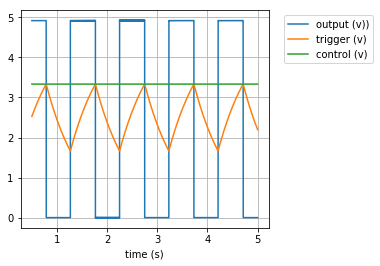

In [3]:
plot.plot(result.time, result.ports.output.v, label='output (v))')
plot.plot(result.time, result.tlc555.pins.trigger.v, label='trigger (v)')
plot.plot(result.time, result.tlc555.pins.control.v, label='control (v)')
plot.xlabel('time (s)')
plot.legend(loc='upper left', bbox_to_anchor=(1.04, 1))
plot.subplots_adjust(right=0.7)
plot.grid()
plot.show()

In [ ]:
output = result.ports.output.v
diff = np.concatenate((np.array([0]), np.diff(output)))
plot.plot(result.time, diff)
plot.scatter(result.time[diff > 1], diff[diff > 1])
plot.scatter(result.time[diff < -1], diff[diff < -1])
plot.show()

print(result.time[diff < -1])
tdeltah = np.diff(result.time[diff > 1])
tdeltal = np.diff(result.time[diff < -1])
print(np.average(np.concatenate((tdeltah, tdeltal))))